# Sentiment Analysis

In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DDM_NLP4.csv')

<IPython.core.display.Javascript object>


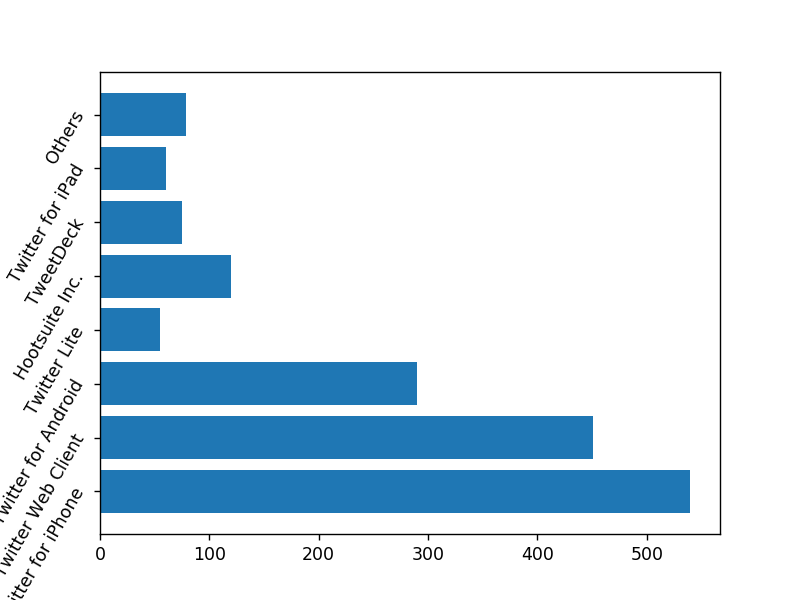

'\nWe can see from the graph below, Our users are tweeting using an iOS devices and a laptop. \nQuite a few users also users use Android version of the app. Twitter lite, Hootsuite Inc, TweetDeck are few other \nplatforms used to tweet.\n'

In [74]:
%matplotlib notebook
'''

To get an idea as to from where users are tweeting from, we can do our best to 
provide our content to multiple platforms.

'''

#Initializing the dictionary with all the names
src={}
for names in df['Source of Tweet']:
    src[names]=0

#Calculating the frequency of all source
for source in df['Source of Tweet']:
    src[source]+=1
    
src['Others']=0  
deleteNames = []
for names in df['Source of Tweet']:
    if src[names] < 50:
        src['Others']+= src[names]
        if names not in deleteNames:
            deleteNames.append(names) 
src['Others'] = int(src['Others'] / len(deleteNames))
for name in deleteNames:
    del src[name]

#Plotting the Results
x = list(src.keys())
y = list(src.values())
plt.barh(x,y)
plt.yticks(rotation=60)
plt.show()

'''
We can see from the graph below, Our users are tweeting using an iOS devices and a laptop. 
Quite a few users also users use Android version of the app. Twitter lite, Hootsuite Inc, TweetDeck are few other 
platforms used to tweet.
'''


In [8]:
'''There are many unwanted characters in the tweet such as a comma, special symbols like @, # or urls which don't 
much towards forming a sentiment of the users. So before we do Sentiment Analysis on the tweet, cleaning it is 
important. Following function does that for us.
'''

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())



In [29]:
#Sentiment Analysis
'''Preparing a dataframe which features such as Tweet Data, Polarity of the tweet and its subjectivity'''
SA = []
for tweet in df['Tweet']:
    data = clean_tweet(tweet)
    analysis = TextBlob(clean_tweet(data))
    SA.append([data, analysis.sentiment.polarity, analysis.sentiment.subjectivity])
#Convert list to numpy array so its easier to form a pandas dataframe
SA = np.array(SA)   
df2 = pd.DataFrame(data=SA, columns=['Data','Polarity','Subjectivity'])
    

In [30]:
df2

,Data,Polarity,Subjectivity
0,b rt uk tortures thyroid patients taking t3 fr...,0.0,0.0
1,b who wants to read my f a q page no pressure ...,0.13333333333333333,0.43333333333333335
2,b 2 2 it either diabetes wins almost all the t...,0.5233333333333333,0.64
3,b rt villa sandi joined the avvenice project v...,0.0,0.0
4,b a massive happy new year 2019 nwishing you a...,0.5194805194805194,0.7935064935064936
5,b rt diabetes diabetes drug duo helps body rep...,0.0,0.0
6,b rt do you know who are most likely to be aff...,0.25,0.75
7,b rt villa sandi joined the avvenice project v...,0.0,0.0
8,b rt villa sandi joined the avvenice project v...,0.0,0.0
9,b 22 off muffins and rumballs all truly low ca...,0.24,0.55


In [31]:
cleanTweets = [n for n in df2['Data']]
Sentiment = [float(n) for n in df2['Polarity']]

In [32]:
#We seperate the positive, negative and neutral tweets from each other and save them in respective files.

positive = open('Positive2.txt', 'w')
negative = open('Negative2.txt', 'w')
neutral = open('Neutral2.txt', 'w')
holder = []
for tweet in cleanTweets:
    if Sentiment[cleanTweets.index(tweet)] > 0:
        if tweet not in holder:
            holder.append(tweet)
            positive.write(tweet + '\n')
        
    elif Sentiment[cleanTweets.index(tweet)] < 0:
        if tweet not in holder:
            holder.append(tweet)
            negative.write(tweet + '\n')
    else:
        if tweet not in holder:
            holder.append(tweet)
            neutral.write(tweet + '\n')

positive.close()
negative.close()
neutral.close()

In [38]:
'''
To get a general idea as to what are the most frequently used words in the Diabetes community we use a Python library 
WordCloud. It will display the most common words bigger than others and give a general idea of repetitive phrases
in a tweet.
'''
file = open('Positive2.txt', 'r')
#file = open('Neutral2.txt', 'r')
#file = open('Negative2.txt', 'r')
fi = file.read()

In [39]:
from collections import Counter
from nltk.corpus import stopwords

nltk_words = list(stopwords.words('english'))
fi = fi.split()
filterout = ['b', 'rt', 'n', 'gt', '2', 'fuck', 'gbdoc', 'doc']
fi = [x for x in fi if x not in filterout]
word = [w for w in fi if not w in nltk_words]
output = Counter(word)


In [40]:
OutputSorted = sorted(output, key=output.__getitem__, reverse=True)

In [41]:
dis = {}
for n in range(0,30):
    dis[OutputSorted[n]] = output[OutputSorted[n]]
print(dis)
FinalWords = open('final.txt', 'w')
for words in OutputSorted[:30]:
    FinalWords.write(words + '\n')
FinalWords.close()


{'diabetes': 687, 'new': 197, 'year': 152, 'health': 107, '2019': 104, 'happy': 86, 'amp': 80, 'type': 77, 'healthy': 59, 'people': 58, 'sugar': 56, 'diet': 54, 'blood': 51, 't1d': 48, 'get': 44, 'great': 43, 'help': 42, 'obesity': 40, 'good': 39, 'insulin': 39, 'make': 38, '1': 38, 'diabetic': 36, 'high': 36, 'risk': 36, 'see': 35, 'best': 34, 'us': 33, 'free': 32, 'know': 31}


<IPython.core.display.Javascript object>


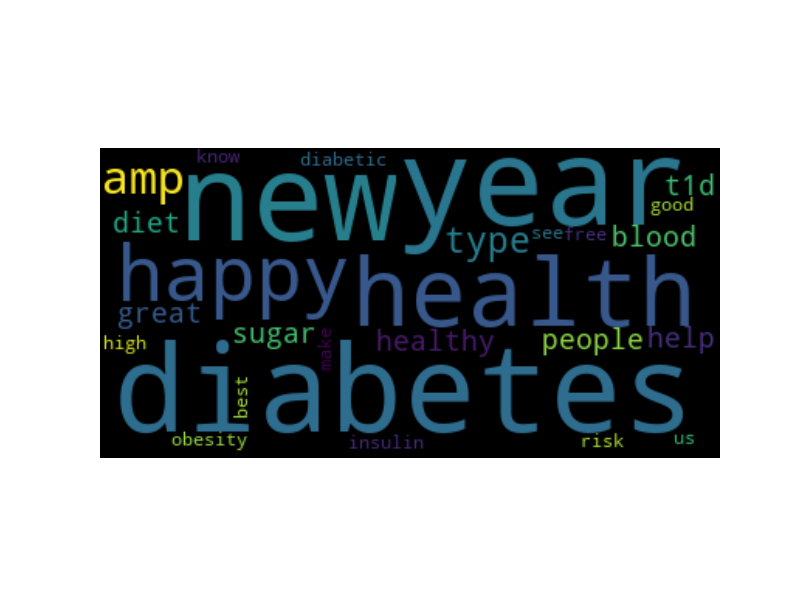

(-0.5, 399.5, 199.5, -0.5)

In [70]:
%matplotlib notebook
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'final.txt')).read()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


<IPython.core.display.Javascript object>


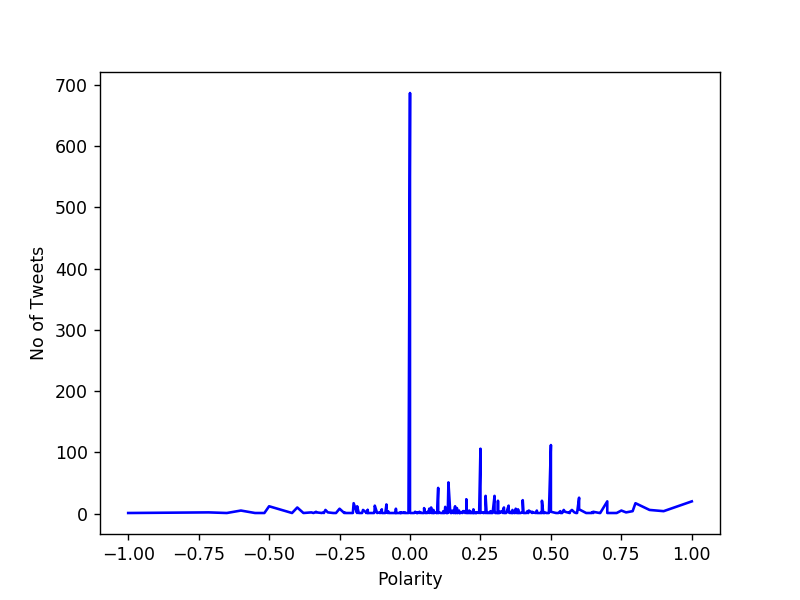

'\nWe can see from the graph below that most of the tweets published \n'

In [58]:
%matplotlib notebook
'''
Plotting the result of Polarity of tweets. 
'''
values = df2['Polarity'].unique()
values = [float(n) for n in values]
values = sorted(values)

cc = Counter(df2['Polarity'])

pol = [cc[str(n)] for n in values]

plt.plot(values,pol,color="blue")
plt.ylabel('No of Tweets')
plt.xlabel('Polarity')
plt.show()

'''
We can see from the graph below that most of the tweets published were fairly neutral. In comparison with positive
and negative tweet, we can observe the plot shivers more in positive side and remains flat on negative side which indicate 
people tweeting regarding Diabetes are in a Positive mood. 
'''

<IPython.core.display.Javascript object>


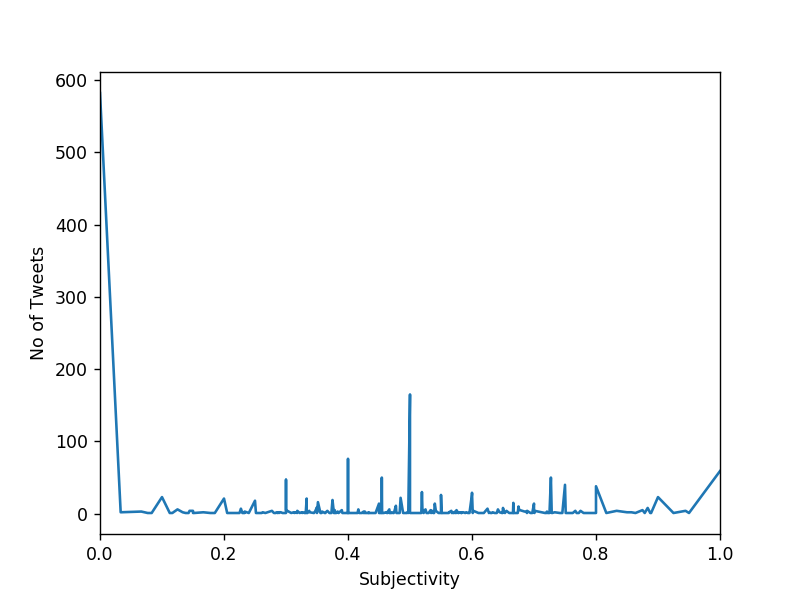

In [57]:
%matplotlib notebook
'''
Subjectivity refers to public opinion. 
'''
values = df2['Subjectivity'].unique()
values = [float(n) for n in values]
values = sorted(values)
cc = Counter(df2['Subjectivity'])

subj = [cc[str(n)] for n in values]
plt.plot(values, subj)
plt.ylabel('No of Tweets')
plt.xlabel('Subjectivity')
plt.xlim(0,1)
plt.show()

'''
It is quite evident from the graph that there are less opinions rather just thoughts of users in tweets. Roughly 200 tweets
were 50 percent subjective wherelse nearly 100 tweets were having strong subjectibity rating assosiated to it.
'''

Counter({21: 227, 17: 131, 19: 129, 14: 125, 16: 120, 20: 118, 18: 116, 22: 110, 13: 101, 11: 82, 15: 80, 12: 78, 23: 74, 0: 70, 5: 70, 1: 66, 2: 57, 10: 48, 6: 38, 9: 37, 3: 36, 8: 35, 7: 27, 4: 25})


<IPython.core.display.Javascript object>


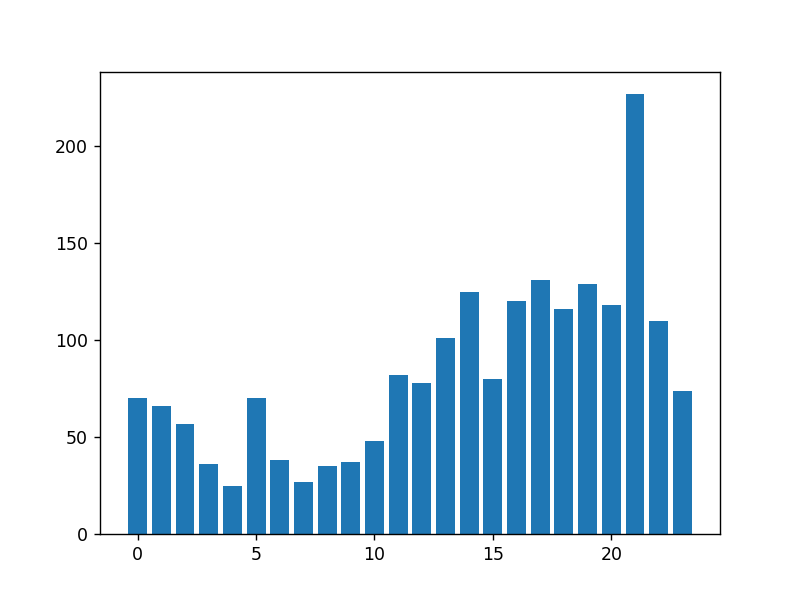

In [69]:
#Plotting what time is preferred by users to tweet
%matplotlib notebook
t = [n for n in df['Hour']]
t_count = Counter(t)
print(t_count)
plt.bar(list(t_count.keys()),list(t_count.values()))
plt.show()
'''
As we see from the graph below, Most favourite time of users to tweet is from 2pm till 10pm. Time around 8-9pm 
seems to generate maximum tweets. 
'''